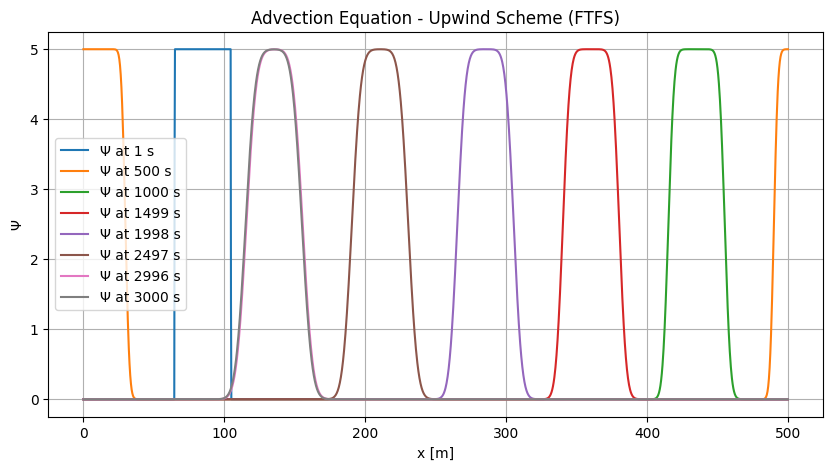

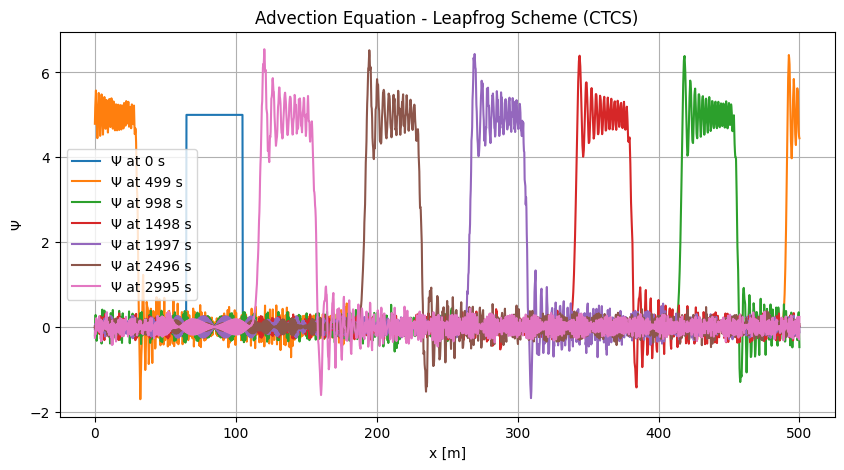

In [3]:
import numpy as np
import matplotlib.pyplot as plt

x0 = 0
x1 = 500
dx = 0.25
u = -0.15
t0 = 0
t1 = 3000
tp = 500

nx = int((x1 - x0) / dx) + 1
x = np.linspace(x0, x1, nx)


def psi0(x):
    return 5.0 if 65 <= x < 105 else 0.0

def ftbs(phi_n, c):
    return (1 - c) * phi_n + c * np.roll(phi_n, 1)

def ftfs(phi_n, c):
    return (1 + c) * phi_n - c * np.roll(phi_n, -1)

def ctcs(phi_old, phi_new, c):
    return phi_old - c * (np.roll(phi_new, -1) - np.roll(phi_new, 1))

dt = 1.2
nt = int((t1 - t0) / dt)
tp_steps = int(tp / dt)
c = u * dt / dx


psi = np.array([psi0(xi) for xi in x])
t = t0
times_saved = []

fig1, ax1 = plt.subplots(figsize=(10, 5))

for n in range(nt):
    if u > 0:
        psi_n = ftbs(psi, c)
    else:
        psi_n = ftfs(psi, c)  
    psi = psi_n
    t += dt
    if n % tp_steps == 0:
        ax1.plot(x, psi, label=f'Ψ at {t:.0f} s')
        times_saved.append(round(t))

if round(t1) not in times_saved:
    ax1.plot(x, psi, label=f'Ψ at {t1:.0f} s')

ax1.set_title('Advection Equation - Upwind Scheme (FTFS)')
ax1.set_xlabel('x [m]')
ax1.set_ylabel('Ψ')
ax1.grid(True)
ax1.legend()


phi_old = np.array([psi0(xi) for xi in x])
phi_new = phi_old.copy()

solu = [phi_new.copy()]
times = [0]

for n in range(1, nt + 1):
    phi_next = ctcs(phi_old, phi_new, c)
    phi_old[:] = phi_new.copy()
    phi_new[:] = phi_next.copy()

    if n % tp_steps == 0:
        solu.append(phi_new.copy())
        times.append(n * dt)

fig2, ax2 = plt.subplots(figsize=(10, 5))
for i, sol in enumerate(solu):
    ax2.plot(x, sol, label=f'Ψ at {times[i]:.0f} s')

ax2.set_title('Advection Equation - Leapfrog Scheme (CTCS)')
ax2.set_xlabel('x [m]')
ax2.set_ylabel('Ψ')
ax2.grid(True)
ax2.legend()

plt.show()
